In [95]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.color as color
import skimage.filters as filters
from pathlib import Path
import h5py
import pandas as pd
import seaborn as sns

sns.set(style="ticks")
import matplotlib as mpl

# mpl.rcParams['font.name'] = 'Helvetica'
mpl.rcParams['font.style'] = 'italic'
# [(m, mpl.rcParams[m]) for m in mpl.rcParams.keys() if 'font' in m]

In [96]:
subject, run = '001', '00'

base_dir = Path().resolve().parent
log_dir = base_dir / 'logs'

events_tsv = pd.read_csv(log_dir / f'sub-{subject}_run-{run}_task-pRF_events.tsv', sep='\t')
stim_events_df = events_tsv[(events_tsv['event_type'] == 'stim') & ~np.isnan(events_tsv['bar_width'])]

stim_task_events = pd.read_csv(log_dir / f'sub-{subject}_run-{run}_task-pRF_fix_responses.tsv',
                                sep='\t',
                                header=None,
                                names=['response_time', 'event_time', 'reaction_time'])

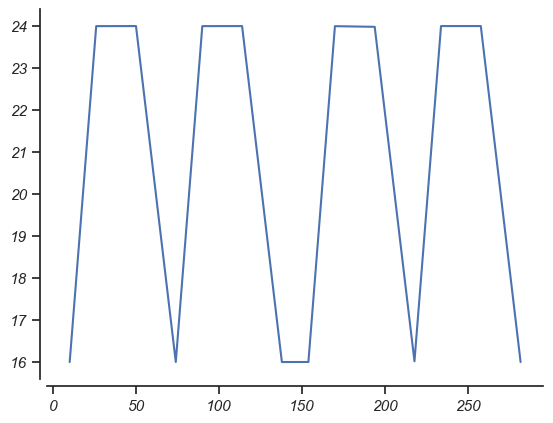

In [97]:
plt.plot(stim_events_df['onset'], np.r_[np.diff(stim_events_df['onset'] - stim_events_df['onset'].iloc[0]), 16])
sns.despine(offset=5)

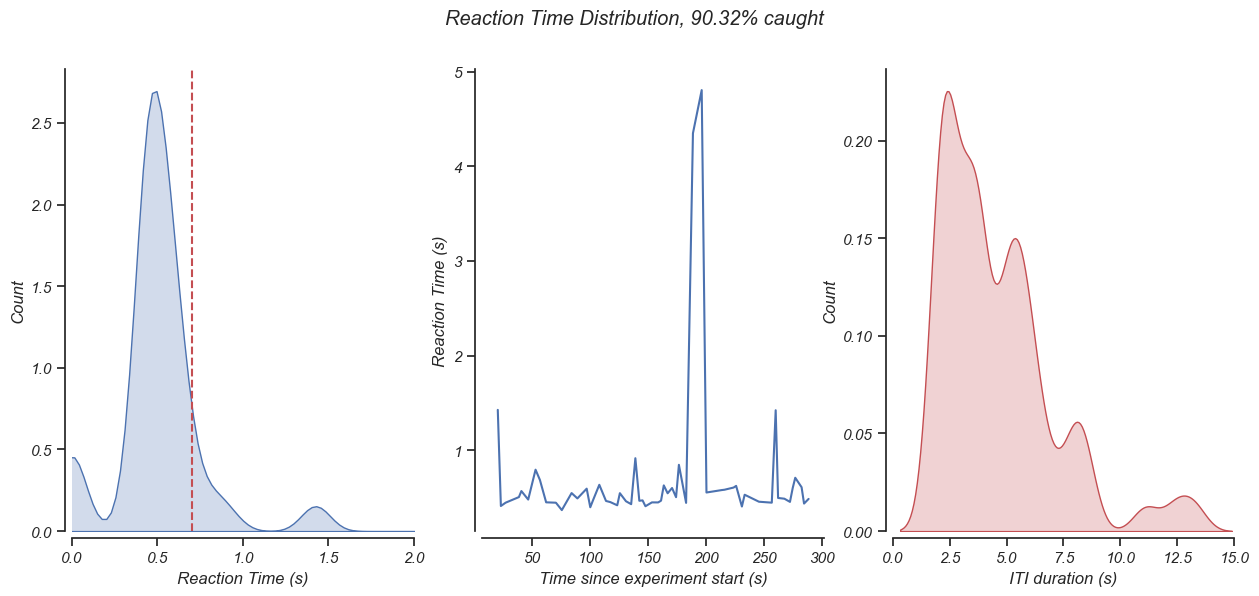

In [98]:
responded_events = stim_task_events['response_time'] != 0
perc_caught = responded_events.sum() / stim_task_events.shape[0]
mean_rt = stim_task_events[responded_events]['reaction_time'].mean()

f, ss = plt.subplots(1,3,figsize=(15,6))
f.suptitle(f"Reaction Time Distribution, {100*perc_caught:2.2f}% caught")

sns.kdeplot(stim_task_events['reaction_time'], fill=True, color='b', bw_adjust=0.25, ax=ss[0])
ss[0].set_xlim(0, 2)
ss[0].set_xlabel('Reaction Time (s)')
ss[0].axvline(mean_rt, color='r', linestyle='--')
ss[0].set_ylabel('Count')

ss[1].plot(stim_task_events['response_time'][stim_task_events['response_time'] != 0], stim_task_events['reaction_time'][stim_task_events['response_time'] != 0])
ss[1].set_xlabel('Time since experiment start (s)')
ss[1].set_ylabel('Reaction Time (s)')

sns.kdeplot(np.diff(stim_task_events['event_time']), fill=True, color='r', bw_adjust=0.5, ax=ss[2])
ss[2].set_xlim(0, 15)
ss[2].set_xlabel('ITI duration (s)')
# ss[0].axvline(mean_rt, color='r', linestyle='--')
ss[2].set_ylabel('Count')

sns.despine(f, offset=5)